In [34]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import openpyxl
from openpyxl import load_workbook

In [35]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list


# function to check whether the list is empty or not
def is_list_empty(list):
    # checking the length
    if len(list) == 0:
        # returning true as length is 0
        return True
    # returning false as length is greater than 0
    return False

In [36]:
url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/vacant%20spaces_bigger%20radius_ugc.txt"
resp = requests.get(url)
vacant_spaces = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/used%20waste_ugc.txt"
resp = requests.get(url)
used_waste_source = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/occupied%20nodes_ugc.txt"
resp = requests.get(url)
occupied_nodes = json.loads(resp.text)

In [37]:
#retrieve connections between vacant spaces within radius=x
url1="https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges_try3_UGC.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_waste300  = [tuple(i) for i in edges1]

#retrieve connections within radius=x with identifiers
url1="https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges_vacant300_UGC.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_space300 = [tuple(i) for i in edges1]
print(len(nearby_waste300))

35


In [38]:
occupied={}
for space in occupied_nodes:
    if occupied_nodes[space]["system"]!=None:
        occupied[space]={}
        occupied[space]["system"]=occupied_nodes[space]["system"]

for occ in occupied:
    if occ in vacant_spaces:
        vacant_spaces.pop(occ)

In [39]:
#NOTE : SHOULD REMOVE OCCUPIED VACANT SPACES, AND USED WASTE SOURCES FROM THE DICTIONARIES

nearby_waste100=[]
nope=[]
for index,couple in enumerate(nearby_waste300):
    if couple[0] not in occupied:
        print(couple[0])
        nearby_waste100.append(couple)
    else:
        nope.append(couple)


V0
V0
V0
V0
V0
V1
V1
V1
V1
V1
V2
V2
V2
V2
V2
V3
V3
V3
V3
V3
V4
V4
V4
V4
V4
V5
V5
V5
V5
V5


In [40]:
for count in range(len(nearby_waste100)):
    for couple in nearby_waste100:
        if couple[1] in used_waste_source:
            # print(couple)
            nearby_waste100.remove(couple)

for couple in nearby_waste100:
    if couple[1] in used_waste_source:
        print(couple)

In [41]:
workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        if value[4]!=0:
            wastes[value[0]]={}
            wastes[value[0]]["location"]=value[1]
            wastes[value[0]]["source"]=value[2]
            wastes[value[0]]["tag"]=value[5]
            wastes[value[0]]["type"]=value[3]
            wastes[value[0]]["size"]=int(value[4])
            wastes[value[0]]["node_type"]="waste"

In [42]:
for waste in wastes:
    for couple in nearby_waste100:
        if wastes[waste]["type"]=="None":
            if waste in couple:
                print(couple, "removed")
                nearby_waste100.remove(couple)
                print(couple,"removed")

In [43]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"SF","weight":3,"solar":2,"in":["W7"],"supplement":["S5"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":None,"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]}
}

critical_items=["W1","W2","W3", "W4"]
non_critical_items=["W5","W6","W7"]

0. Prepare Data For Decision Making

In [44]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
# print(v_potential)

# NOTE: Activate to include non transferable rule!
for couple_count in range(len(nearby_waste100)):
    for couple in nearby_waste100:
        if couple[1] in wastes:
            for index,item in enumerate(couple):
                if couple[0] in vacant_spaces:
                    if vacant_spaces[couple[0]]["building"]!=wastes[couple[1]]["source"]:
                        # print(couple,vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
                        if (wastes[couple[1]]["type"]=="W5") or (wastes[couple[1]]["type"]=="W6") or (wastes[couple[1]]["type"]=="W7"):
                            if couple in nearby_waste100:
                                # print(couple,wastes[couple[1]]["type"])
                                # print("removed",couple,wastes[couple[1]]["type"],vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
                                nearby_waste100.remove(couple)
        else:
            print(couple,"non transferable")
                

print(nearby_waste100)  


[('V0', 'WO1'), ('V0', 'WO4'), ('V1', 'WO1'), ('V1', 'WO4'), ('V2', 'WO1'), ('V2', 'WO4'), ('V3', 'WO1'), ('V3', 'WO4'), ('V4', 'WO1'), ('V4', 'WO4'), ('V5', 'WO1'), ('V5', 'WO4')]


{'V0': ['WO1', 'WO4'], 'V1': ['WO1', 'WO4'], 'V2': ['WO1', 'WO4'], 'V3': ['WO1', 'WO4'], 'V4': ['WO1', 'WO4'], 'V5': ['WO1', 'WO4']}


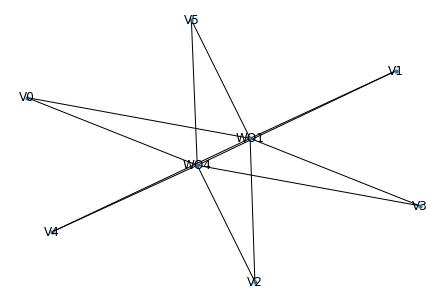

In [45]:
# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i,j in vacant_spaces.items():
    G.add_node(i)
G.add_edges_from(nearby_waste100)
nx.draw(G, with_labels=True, node_size=10)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    if i in vacant_spaces:
        waste_dict[i]=k
        
#List of dictionaries we will use:
# print(v_potential)
print(waste_dict)
# print(uf_systems)

# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}
for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]  

In [46]:
print((v_potential))

{'V0': {'tag': 'V0', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V1': {'tag': 'V1', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V2': {'tag': 'V2', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V3': {'tag': 'V3', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}}


Design Rule 3.0 : Sharing Existing Resources
    


Prepare Data

In [47]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    for system,demanded in k.items():
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found_dict[i][system]["source"]={}
        found=[]
        source=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                if waste in wastes:
                    available = wastes[waste]["type"]
                    source2 = wastes[waste]["tag"]
                    print(i,wastes[waste])
                    source_size = wastes[waste]["size"]
                    if each == available:
                        found.append(available)
                        source.append(source2)
                        found_dict[i][system]["found"]=found
                        found_dict[i][system]["source"]=source


V0 {'location': '{274.847735, 547.422372, 0}', 'source': 'BK', 'tag': 'WO1', 'type': 'W2', 'size': 592000, 'node_type': 'waste'}
V0 {'location': '{274.847735, 547.422372, 0}', 'source': 'BK', 'tag': 'WO1', 'type': 'W2', 'size': 592000, 'node_type': 'waste'}
V0 {'location': '{274.847735, 547.422372, 0}', 'source': 'BK', 'tag': 'WO1', 'type': 'W2', 'size': 592000, 'node_type': 'waste'}
V0 {'location': '{190.949597, 634.676436, 0}', 'source': 'BK', 'tag': 'WO4', 'type': 'W4', 'size': 40142, 'node_type': 'waste'}
V0 {'location': '{190.949597, 634.676436, 0}', 'source': 'BK', 'tag': 'WO4', 'type': 'W4', 'size': 40142, 'node_type': 'waste'}
V0 {'location': '{190.949597, 634.676436, 0}', 'source': 'BK', 'tag': 'WO4', 'type': 'W4', 'size': 40142, 'node_type': 'waste'}
V0 {'location': '{274.847735, 547.422372, 0}', 'source': 'BK', 'tag': 'WO1', 'type': 'W2', 'size': 592000, 'node_type': 'waste'}
V0 {'location': '{274.847735, 547.422372, 0}', 'source': 'BK', 'tag': 'WO1', 'type': 'W2', 'size': 5

In [48]:
#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

#reach sizes of duplicate items
for i,k in found_dict.items():
    for system in k:
        found_items=found_dict[i][system]["found"]


In [49]:
#add circularity percentage to found_dict
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["circularity"]=[]
        found=len(found_dict[space][system]["found"])
        missing=len(found_dict[space][system]["missing"])
        total=found+missing
        found_dict[space][system]["circularity"]=found/total
        # print(space)
# print(found_dict)   

#make a duplicate of found dict, sort system based on circularities
sorted_dict={}
for space in found_dict:
    system=sorted(found_dict[space], key=lambda x: (found_dict[space][x]['circularity']), reverse=True)  
    sorted_dict[space]={} 
    for item in system:
        values={}
        values=(found_dict[space][item])
        sorted_dict[space][item]=values


In [50]:
print(len(found_dict))

5


In [51]:

print(len(sorted_dict))

5


Assign Food Production System To Vacant Space

In [52]:
new_edges=[]
occupied_dict={}
for space in sorted_dict:
    occupied_dict[space]={}
    occupied_dict[space]["system"]={}
    occupied_dict[space]["found"]={}
    occupied_dict[space]["source"]={}
    occupied_dict[space]["missing"]={}
    for system in sorted_dict[space]:
        if len(sorted_dict[space][system]["found"])!=0: 
            
            for missing in sorted_dict[space][system]["missing"]:
                print(space,"there are found items",missing)
                if missing in non_critical_items:
                    print(space)
                    occupied_dict[space]["system"]=system  
                    occupied_dict[space]["found"]=(sorted_dict[space][system]["found"])
                    occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                    occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                    for items in sorted_dict[space][system]["found"]:
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
            if len(occupied_dict[space]["system"])!=0:
                break


In [53]:

(occupied_dict)

{'V0': {'system': {}, 'found': {}, 'source': {}, 'missing': {}},
 'V1': {'system': {}, 'found': {}, 'source': {}, 'missing': {}},
 'V2': {'system': {}, 'found': {}, 'source': {}, 'missing': {}},
 'V3': {'system': {}, 'found': {}, 'source': {}, 'missing': {}},
 'V4': {'system': {}, 'found': {}, 'source': {}, 'missing': {}}}

In [60]:
for space in sorted_dict:
    for system in sorted_dict[space]:
        if len(occupied_dict[space]["system"])==0:
            if len(sorted_dict[space][system]["found"])==0: 
                if len(sorted_dict[space][system]["missing"])==1:
                    for missing in sorted_dict[space][system]["missing"]:
                        if missing in non_critical_items:
                            print(space)
                            occupied_dict[space]["system"]=system  
                            occupied_dict[space]["found"]=None
                            occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                            occupied_dict[space]["source"]="supply externally"
                    if len(occupied_dict[space]["system"])!=0:
                        break

                if len(sorted_dict[space][system]["missing"])==2:
                    for missing in sorted_dict[space][system]["missing"]:
                        if missing in non_critical_items:
                            print(space)
                            occupied_dict[space]["system"]=system  
                            occupied_dict[space]["found"]=None
                            occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                            occupied_dict[space]["source"]="supply externally"
                    if len(occupied_dict[space]["system"])!=0:
                        break
print(occupied_dict)

{'V0': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V1': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V2': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V3': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V4': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}}


Create New List To Be Used In Next Steps

In [55]:
# print(occupied)  
# print(used_waste_source) 
# print(new_edges)
# print(occupied_dict)
#add circularity & outputs to occupied_dict
for space in occupied_dict:
    occupied_dict[space]["circularity"]={}
    occupied_dict[space]["outputs"]={}
    occupied_dict[space]["supplements"]={}
    if len(occupied_dict[space]["system"])!=0:
        system=occupied_dict[space]["system"]
        outputs=(uf_systems[system]["out"])
        supplements=uf_systems[system]["supplement"]
        # occupied_dict[space]["circularity"]=found_dict[space][system]["circularity"]
        occupied_dict[space]["supplements"]=supplements
        occupied_dict[space]["outputs"]=outputs
#remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)
# print("occupied",occupied_dict)

#remove assigned spaces from found_dict
remove2=[]
for space in sorted_dict:
    if space in occupied_dict:
        remove2.append(space)
print(len(remove))
for items in remove2:
    sorted_dict.pop(items)

0


6. Assign Food Producing Supplementary Systems

Prepare Data

In [56]:
#look for a system that can supply needed supplement
#put the findings in a dictionary
v_supplement_fs={}
for space in occupied_dict:
    v_supplement_fs[space]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["fs_system"]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["supplement source"]={}
    v_supplement_fs[space]["fs_demand"]={}
    v_supplement_fs[space]["fs_demand source"]={}
    v_supplement_fs[space]["potential source"]={}
    supplement=occupied_dict[space]["supplements"]
    if supplement!= None:
        for item in supplement:
            if item=="S2": 
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    if "S2" in out:
                        print("maybe",space, i,uf_systems[i]["in"])
                        v_supplement_fs[space]["fs_system"]=i
                        v_supplement_fs[space]["supplement"]=item
                        v_supplement_fs[space]["fs_demand"]=uf_systems[i]["in"]
    else:
        v_supplement_fs[space]["fs_system"]=None

print(v_supplement_fs)


{'V0': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V1': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V2': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V3': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V4': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}}


In [57]:
#created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type
#for each space found what kind of system and supplement and input is necessary 

#look neighbors of supplement needing space to see if there is a potential neighbor
for space in v_supplement_fs:
    potential=[]
    if space in vacant_spaces:
        
        for space2,neighbor in nearby_space100:
            if neighbor in vacant_spaces:
                if space==space2:
                    if (v_supplement_fs[space]["supplement source"]==None) and (len(v_supplement_fs[space]["fs_system"])!=0):
                        # print(neighbor,"is available")
                        system=v_supplement_fs[space]["fs_system"]
                        print(system,"system")
                        print(vacant_spaces[space]["size"],vacant_spaces[neighbor]["size"])
                        if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                            potential.append(neighbor)
                            # print(space,potential)
                            v_supplement_fs[space]["potential source"]=potential
                elif space==neighbor:
                        print(neighbor,space2,"reverse is available")
                        if (v_supplement_fs[space]["supplement source"]==None) and (len(v_supplement_fs[space]["fs_system"])!=0):
                            print(space2,"is available")
                            system=v_supplement_fs[space]["fs_system"]
                            if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                                potential.append(space2)
                                print(potential)
                                print(space,potential)
                                print(space,"matches",space2,"and",system)
                                v_supplement_fs[space]["potential source"]=potential
                            else:
                                print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                                print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                        else:
                            print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
    # print(v_supplement_fs)


In [58]:
#check if potential sources have fs_demand
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        # print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            print(nearby_list)
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        if v_supplement_fs[space]["fs_demand"]==wastes[nearby]["type"]:
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]=nearby
                            print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break
                        elif v_supplement_fs[space]["fs_demand"]!=wastes[nearby]["type"]:
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]="supply externally"
                            print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
print(v_supplement_fs)  
# print(used_waste_source) 
# print(new_edges)     
print("occupied",occupied_dict)

for space in v_supplement_fs:
    if (v_supplement_fs[space]["fs_system"])!=None:
        if ((v_supplement_fs[space]["supplement source"])!=None) and (len(v_supplement_fs[space]["supplement source"])!=0)and (v_supplement_fs[space]["fs_demand source"]!="supply externally"):
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
        elif v_supplement_fs[space]["fs_demand source"]=="supply externally":
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=None
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
print(occupied_dict)



{'V0': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V1': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V2': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V3': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}, 'V4': {'supplement': {}, 'fs_system': {}, 'supplement source': {}, 'fs_demand': {}, 'fs_demand source': {}, 'potential source': {}}}
occupied {'V0': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V1': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}

In [61]:
# print(occupied_dict)
for space in v_supplement_fs:
    if (v_supplement_fs[space]["supplement source"])!={}:
        if (v_supplement_fs[space]["fs_system"])!={}:
        
            if len(v_supplement_fs[space]["supplement source"])!=0:
                occ=v_supplement_fs[space]["supplement source"]
                occupied_dict[occ]={}
                print(occupied_dict)
                occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
                occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
                occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
    # print(occupied_dict)

#now we have food supplying supplementary systems
#we still need to check if these systems need supplements
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    # print(system)
    # print(uf_systems[system]["supplement"])
    value=uf_systems[system]["supplement"]
    if value!=None:
        for supplement in value:
            if (supplement=="S5") or (supplement=="S4"):
                v_supplement_fs[space]={}
                v_supplement_fs[space]["supplement"]=supplement
                for uf in uf_systems:
                    for out in uf_systems[uf]["out"]:
                        if supplement == out:
                            v_supplement_fs[space]["fs_system"]=uf
                            v_supplement_fs[space]["fs_demand"]=uf_systems[uf]["in"]
                    if len(v_supplement_fs[space]["fs_system"])>0:
                        break
                v_supplement_fs[space]["supplement source"]={}
                v_supplement_fs[space]["fs_demand source"]={}
                v_supplement_fs[space]["potential source"]={}
print(v_supplement_fs)


{'V0': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': {}}, 'V1': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': {}}, 'V2': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': {}}, 'V3': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': {}}, 'V4': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': {}}}


In [63]:
#make a potential list
for space in v_supplement_fs:
    potential=[]
    print(space)
    if space in vacant_spaces:
        
        for space2,neighbor in nearby_space300: 
            if neighbor in vacant_spaces: 
                if space2 in vacant_spaces:
                    if (space==space2):
                        print(space2,neighbor)
                        if (len(v_supplement_fs[space]["supplement source"])==0) and (v_supplement_fs[space]["fs_system"]!=None):
                            print(neighbor,"is available")
                            system=v_supplement_fs[space]["fs_system"]
                            if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                                potential.append(neighbor)
                                print(potential)
                                print(space,potential)
                                v_supplement_fs[space]["potential source"]=potential
                            else:
                                print(space,vacant_spaces[neighbor]["structure"],system,uf_systems[system]["weight"])
                        else:
                            print(space,neighbor,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
                    elif space==neighbor:
                        print(neighbor,space2,"reverse is available")
                        if (v_supplement_fs[space]["supplement source"]=={}) and ((v_supplement_fs[space]["fs_system"])!=None):
                            print(space,space2,"is available")
                            system=v_supplement_fs[space]["fs_system"]
                            print(space2,"is available",system)
                            if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                                potential.append(space2)
                                print(potential)
                                print(space,potential)
                                print(space,"matches",space2,"and",system)
                                v_supplement_fs[space]["potential source"]=potential
                            else:
                                print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                                print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                                print("size",vacant_spaces[space]["size"]==vacant_spaces[space2]["size"])
                        else:
                            print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
    # print(v_supplement_fs)


V0
V0 V3
V3 is available
V0 3 UF1 3
V0 V4
V4 is available
V0 3 UF1 3
V0 V2
V2 is available
['V2']
V0 ['V2']
V0 V1
V1 is available
['V2', 'V1']
V0 ['V2', 'V1']
V0 V5
V5 is available
V0 3 UF1 3
V0 V1 reverse is available
V0 V1 is available
V1 is available UF1
['V2', 'V1', 'V1']
V0 ['V2', 'V1', 'V1']
V0 matches V1 and UF1
V0 V2 reverse is available
V0 V2 is available
V2 is available UF1
['V2', 'V1', 'V1', 'V2']
V0 ['V2', 'V1', 'V1', 'V2']
V0 matches V2 and UF1
V0 V3 reverse is available
V0 V3 is available
V3 is available UF1
structure V0 3 UF1 3
sun V0 3 UF1 1
size False
V0 V4 reverse is available
V0 V4 is available
V4 is available UF1
structure V0 3 UF1 3
sun V0 3 UF1 1
size False
V0 V5 reverse is available
V0 V5 is available
V5 is available UF1
structure V0 3 UF1 3
sun V0 2 UF1 1
size False
V1
V1 V0 reverse is available
V1 V0 is available
V0 is available UF1
['V0']
V1 ['V0']
V1 matches V0 and UF1
V1 V4
V4 is available
V1 3 UF1 3
V1 V2
V2 is available
['V0', 'V2']
V1 ['V0', 'V2']
V1 V3
V

In [64]:
#check if potential sources have fs_demand
print(used_waste_source)
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        for vacant in potential:
            found=[]
            found_source=[]
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                if nearby in wastes:
                    print(vacant, nearby,"is",wastes[nearby]["type"])
                    if nearby not in used_waste_source:
                        if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                            print(nearby,"not used")
                            found.append(wastes[nearby]["type"])
                            found_source.append(nearby)
                            print(found)
                            if v_supplement_fs[space]["fs_demand"]==found:
                                print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                                v_supplement_fs[space]["supplement source"]=vacant
                                print(v_supplement_fs[space]["supplement source"])
                                v_supplement_fs[space]["fs_demand source"]=found_source
                                print(v_supplement_fs[space]["fs_demand source"])
                                for x in found_source:
                                    used_waste_source.append(x)
                                    edge_tuple1=(x,vacant)
                                    new_edges.append(edge_tuple1)
                                edge_tuple2=(vacant,space)
                                new_edges.append(edge_tuple2)
                                print("new edges added",new_edges)
                                if len(v_supplement_fs[space]["supplement source"])>0:
                                    # print(space,system,"will break")        
                                    break
                            elif v_supplement_fs[space]["fs_demand"]!=wastes[nearby]["type"]:
                                v_supplement_fs[space]["supplement source"]=vacant
                                print(v_supplement_fs[space]["supplement source"])
                                v_supplement_fs[space]["fs_demand source"]="supply externally"
                                print(v_supplement_fs[space]["fs_demand source"])
                                used_waste_source.append(nearby)
                                edge_tuple1=(nearby,vacant)
                                edge_tuple2=(vacant,space)
                                new_edges.append(edge_tuple1)
                                new_edges.append(edge_tuple2)
                                if len(v_supplement_fs[space]["supplement source"])>0:
                                    # print(space,system,"will break")        
                                    break

                if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break2")        
                                break
                        
print(v_supplement_fs) 
# print(new_edges)
# print(used_waste_source)

['WO2', 'WO3']
V2 WO1 is W2
V2 WO4 is W4
V1 WO1 is W2
V1 WO4 is W4
V1 WO1 is W2
V1 WO4 is W4
V2 WO1 is W2
V2 WO4 is W4
V0 WO1 is W2
V0 WO4 is W4
V2 WO1 is W2
V2 WO4 is W4
V0 WO1 is W2
V0 WO4 is W4
V2 WO1 is W2
V2 WO4 is W4
V0 WO1 is W2
V0 WO4 is W4
V1 WO1 is W2
V1 WO4 is W4
V1 WO1 is W2
V1 WO4 is W4
V0 WO1 is W2
V0 WO4 is W4
V4 WO1 is W2
V4 WO4 is W4
V4 WO1 is W2
V4 WO4 is W4
V3 WO1 is W2
V3 WO4 is W4
V3 WO1 is W2
V3 WO4 is W4
{'V0': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': ['V2', 'V1', 'V1', 'V2']}, 'V1': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': ['V0', 'V2', 'V0', 'V2']}, 'V2': {'supplement': 'S4', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': ['V0', 'V1', 'V1', 'V0']}, 'V3': {'supplement': '

In [65]:
# print(occupied_dict)
for space in v_supplement_fs:
    if (v_supplement_fs[space]["fs_system"])!=None:
        if len(v_supplement_fs[space]["supplement source"])!=0:
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=v_supplement_fs[space]["fs_system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["circularity"]=1.0
        elif v_supplement_fs[space]["fs_demand source"]=="supply externally":
            print(space)
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=None
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
print(occupied_dict)



{'V0': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V1': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V2': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V3': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}, 'V4': {'system': 'UF6', 'found': None, 'source': 'supply externally', 'missing': ['W6'], 'circularity': {}, 'outputs': ['O1', 'O2', 'W1'], 'supplements': ['S4']}}


In [66]:
for space in sorted_dict:
    for system in sorted_dict[space]:
        if space not in occupied_dict:
            if len(sorted_dict[space][system]["found"])==0: 
                if len(sorted_dict[space][system]["missing"])==3:
                    for missing in sorted_dict[space][system]["missing"]:
                        if missing in non_critical_items:
                            print(space)
                            occupied_dict[space]={}
                            occupied_dict[space]["system"]=system  
                            occupied_dict[space]["found"]=None
                            occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                            occupied_dict[space]["source"]="supply externally"
                    if len(occupied_dict[space]["system"])!=0:
                        break

In [67]:
#make a dictionary of source: waste type: size: receiver:tuple
# network_dict={}
new_edges1=[]
for couple in new_edges:
    if (couple[0]!=[]) and (couple[1]!=[]) :
        new_edges1.append(couple)
print(new_edges1)
network_dict={}
for source,space in new_edges1:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges1:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["outputs"]
    
# print(network_dict)

for space in occupied_dict:
    if occupied_dict[space]["system"]==None:
        print(space)
        occupied_dict.remove(space)
# print(new_edges1)
# print(network_dict)

[]


In [68]:
vacant_spaces2=vacant_spaces.copy()

for space in occupied_dict:
    vacant_spaces2.pop(space)


In [69]:

file = "vacant spaces_bigger radius4_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(vacant_spaces2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")


wastes2=wastes.copy()

for waste in used_waste_source:
    if waste!=[]:
        wastes2.pop(waste)


vacant spaces_bigger radius4_ugc.txt has been updated successfully


In [70]:
file = "available waste 5_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(wastes2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "used waste4_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(used_waste_source, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

available waste 5_ugc.txt has been updated successfully
used waste4_ugc.txt has been updated successfully


In [71]:
# #retrieve data regarding vacant spaces
from openpyxl import load_workbook
workbook = load_workbook(filename="Node_Information_UGC.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

# #create dictionary based on excel worksheet
vacant_spaces={}
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        vacant_spaces[value[0]]={}
        vacant_spaces[value[0]]["location"]=value[1]
        vacant_spaces[value[0]]["tag"]=value[6]
        vacant_spaces[value[0]]["building"]=value[3]
        vacant_spaces[value[0]]["size_real"]=int(value[2])
        vacant_spaces[value[0]]["loc_building"]=value[4]
        vacant_spaces[value[0]]["orientation"]=value[5]
        vacant_spaces[value[0]]["node_type"]="vacant"

for space in vacant_spaces:
    if vacant_spaces[space]["loc_building"]=="roof":
        vacant_spaces[space]["structure"]=1
        vacant_spaces[space]["solar"]=3
    if vacant_spaces[space]["loc_building"]=="basement":
        vacant_spaces[space]["structure"]=3
        vacant_spaces[space]["solar"]=1
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=3

#interpret size based on predefined ranges
for space in vacant_spaces:
    if vacant_spaces[space]["size_real"]<=100:
        vacant_spaces[space]["size"]=1
    if (vacant_spaces[space]["size_real"]>100) and (vacant_spaces[space]["size_real"]<=500) :
        vacant_spaces[space]["size"]=2
    if (vacant_spaces[space]["size_real"]>500):
        vacant_spaces[space]["size"]=3
    
#remove orientation,loc_building,size_real
for space in vacant_spaces:
    vacant_spaces[space].pop("orientation")
    vacant_spaces[space].pop("size_real")
    vacant_spaces[space].pop("loc_building")  

In [72]:
workbook = load_workbook(filename="Node_Information_UGC.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes2={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        wastes2[value[0]]={}
        wastes2[value[0]]["location"]=value[1]
        wastes2[value[0]]["source"]=value[2]
        wastes2[value[0]]["type"]=value[3]
        wastes2[value[0]]["size"]=value[4]
        wastes2[value[0]]["tag"]=value[5]
        wastes2[value[0]]["node_type"]="waste"

In [73]:
#combine wastes and vacant_spaces
workbook = load_workbook(filename="coordintes_xyz_ugc.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

new_edges2=[]
for space in network_dict:
    sources=(network_dict[space]["receiver"])
    tuples=(space,sources)
    new_edges2.append(tuples)

In [74]:
#update locations in dictionary based on excel worksheet
# #create dictionary based on excel worksheet
workbook = load_workbook(filename="Node_Information_UGC.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

vacant_spaces1={}
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        vacant_spaces1[value[0]]={}
        vacant_spaces1[value[0]]["location"]=value[1]
        vacant_spaces1[value[0]]["tag"]=value[6]

workbook = load_workbook(filename="coordintes_xyz.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

coordinate_list1=[]
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
            print(coordinate)
    coordinate_list1.append(coordinate)

for index1,space in enumerate(vacant_spaces1):
    for index2,coordinate in enumerate(coordinate_list1):
        if index1==index2:
            vacant_spaces1[space]["location"]=coordinate_list1[index2]
            

(2020.580643, 387.391529, 0)
(2020.580643, 387.391529, 0)
(2020.580643, 387.391529, 0)
(935.001269, 534.594454, 0)
(935.001269, 534.594454, 0)
(935.001269, 534.594454, 0)
(766.997201, 400.341737, 0)
(766.997201, 400.341737, 0)
(766.997201, 400.341737, 0)
(254.491041, 556.132177, 0)
(254.491041, 556.132177, 0)
(254.491041, 556.132177, 0)
(1770.13761, 751.608275, 0)
(1770.13761, 751.608275, 0)
(1770.13761, 751.608275, 0)
(1189.499865, 487.345394, 0)
(1189.499865, 487.345394, 0)
(1189.499865, 487.345394, 0)
(336.903473, 621.882305, 0)
(336.903473, 621.882305, 0)
(336.903473, 621.882305, 0)
(2237.009725, 595.715597, 0)
(2237.009725, 595.715597, 0)
(2237.009725, 595.715597, 0)
(826.49752, 584.987928, 0)
(826.49752, 584.987928, 0)
(826.49752, 584.987928, 0)
(1886.407729, 148.985643, 0)
(1886.407729, 148.985643, 0)
(1886.407729, 148.985643, 0)
(1238.274556, 660.86452, 0)
(1238.274556, 660.86452, 0)
(1238.274556, 660.86452, 0)
(1491.382251, 454.896508, 0)
(1491.382251, 454.896508, 0)
(1491.382

In [76]:
#update locations in dictionary based on excel worksheet

workbook = load_workbook(filename="coordintes_xyz_ugc.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

coordinate_list2=[]
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list2.append(coordinate)

for index1,space in enumerate(wastes2):
    for index2,coordinate in enumerate(coordinate_list2): 
        if index1==index2:
            # print(index2,coordinate,space)
            wastes2[space]["location"]=coordinate_list2[index2]
combined_dict=vacant_spaces1.copy()
combined_dict.update(wastes2)


coordinates=[]
#make a coordinate list for new_edges [(coordinates1,coordinates2),(coordinates1,coordinates2),(coordinates1,coordinates2)]
for item in new_edges2:
        coordinate_tuple=(combined_dict[item[0]]["location"],combined_dict[item[1]]["location"])
        print(item,coordinate_tuple)
        coordinates.append(coordinate_tuple)
print(coordinate_tuple)

NameError: name 'coordinate_tuple' is not defined

In [77]:
print(len(occupied_dict))
print(len(network_dict))
export_edges_dict={}
for index,couple in enumerate(coordinates):
        export_edges_dict[index]={}
        export_edges_dict[index]["coordinate"]=couple

export_edges_dict={}
for index,waste in enumerate(network_dict):
        export_edges_dict[index]={}
        export_edges_dict[index]["type"]=network_dict[waste]["type"]
        export_edges_dict[index]["connection"]=coordinates[index]

print(export_edges_dict)

5
0
{}


In [78]:
#Make a dictionary of all spaces and systems
export_dict={}
for space in vacant_spaces:
    export_dict[space]={}
    export_dict[space]["location"]={}
    export_dict[space]["system"]={}
for space in vacant_spaces:
    if space in occupied_dict:
        export_dict[space]["system"]=occupied_dict[space]["system"]
        export_dict[space]["location"]=combined_dict[space]["location"]
    else:
        export_dict[space]["system"]=None
        export_dict[space]["location"]=None
print(export_dict)


{'V0': {'location': (2020.580643, 387.391529, 0), 'system': 'UF6'}, 'V1': {'location': (935.001269, 534.594454, 0), 'system': 'UF6'}, 'V2': {'location': (766.997201, 400.341737, 0), 'system': 'UF6'}, 'V3': {'location': (254.491041, 556.132177, 0), 'system': 'UF6'}, 'V4': {'location': (1770.13761, 751.608275, 0), 'system': 'UF6'}, 'V5': {'location': None, 'system': None}, 'V6': {'location': None, 'system': None}}


In [79]:

file = "occupied nodes4_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges4_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(new_edges, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges_dict4_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_edges_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")        

file = "coordinates4_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(coordinates, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

occupied nodes4_ugc.txt has been updated successfully
new_edges4_ugc.txt has been updated successfully
new_edges_dict4_ugc.txt has been updated successfully
coordinates4_ugc.txt has been updated successfully


8. INCREASING RADIUS